## Table of Contents
- What is Fine-tuning? Why is it needed? (5 minutes)
- What is PEFT? (5 minutes)
- Why is it needed? (5 minutes)
- Prerequisites
  - Machine Learning, Python, Transformers
- Few Techniques (10 minutes)
  - prefix tuning
  - p-tuning
  - prompt tuning
  - LoRA and Q-LoRA
  - and many more
- LoRA (15 minutes)
  - Key Idea
  - Benefits
- Huggingface and PEFT library (10 minutes)
  - Libraries - `peft, huggingface, etc.`
  - (Optional) huggingface token with write access if you want to save
- Finetuning with PEFT and LoRA (30-45 minutes)
  - Load the Foundation model
  - Model output without PEFT
  - Create bitsandbytes config, If needed
  - Create LoRA config
  - Create trainer
  - Train the model (save if needed)
  - Re-load the saved model and do Inference
- Q & A (15-20 minutes)

## PEFT

- Technqiues to fine-tune LLMs using a small subset of parameters.
- Achieves comparable performance to full fine-tuning while significantly reducing computational requirements
- Less compute and less training data needed

Comparison with Full-fine tuning

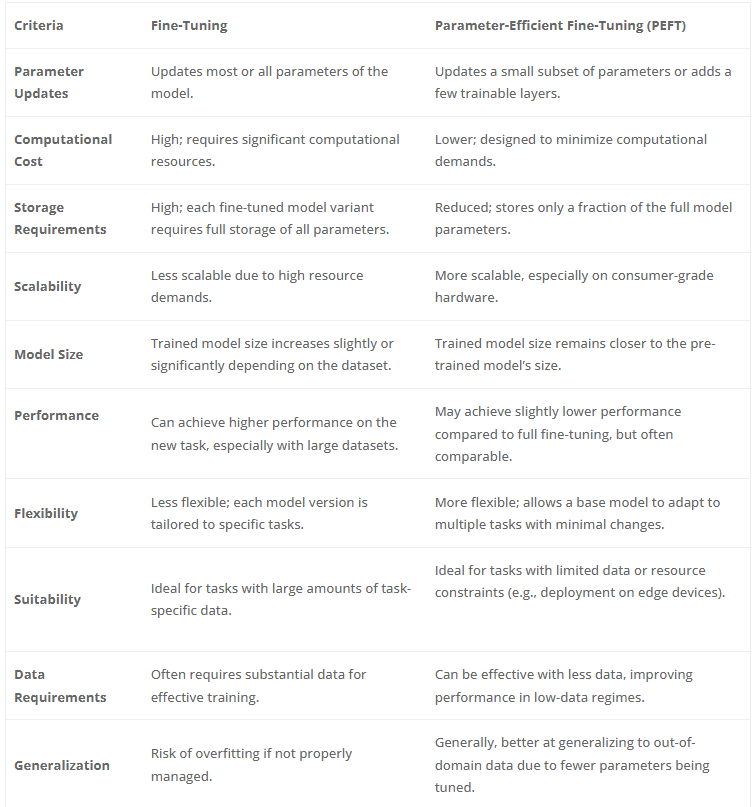

## PEFT Techniques
- Prompt Tuning
- [Prefix Tuning](https://magazine.sebastianraschka.com/p/understanding-parameter-efficient)
- p-tuning
- LoRA and Q-LoRA
- and many more...

## LoRA and Q-LoRA
- Key Idea: Use low-rank matrices for tuning the additional model parameters.
- Why?
  - Good for handling Catastrophic forgetting (Usually happens with Full fine-tuning)
  - It needs less data
  - Can be applied to various modalities i.e. audio, text...
- Steps:
  - Add extra parameters
  - Train and tune those parameters with Supervised Fine Tuning dataset
  - Add extra parameters back to original model weights

## Finetuning wiht PEFT & LoRA
- Foundation Model: [microsoft/Phi-3-mini-4k-instruct](https://huggingface.co/microsoft/Phi-3-mini-4k-instruct)
- Dataset: `Abirate/english_quotes`
- Libraries: `peft, transformers, datasets`
- GPU: As per the model parameters

### Install libraries

In [ ]:
!pip install bitsandbytes datasets accelerate loralib -q
!pip install git+https://github.com/huggingface/transformers.git@main git+https://github.com/huggingface/peft.git -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 75.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which

### Libraries and Their Workings:
- `transformers` - Provides APIs and tools to easily download and train state-of-the-art pretrained models for NLP, CV, Audio, and Multimodal models with support of PyTorch, Tensorflow, and JAX.
For example:
  - 📝 Natural Language Processing: text classification, named entity recognition, question answering, language modeling, summarization, translation, multiple choice, and text generation.
  - 🖼️ Computer Vision: image classification, object detection, and segmentation.
  - 🗣️ Audio: automatic speech recognition and audio classification.
  - 🐙 Multimodal: table question answering, optical character recognition, information extraction from scanned documents, video classification, and visual question answering.
- `accelerate` -  Enables the same PyTorch code to be run across any distributed configuration to make training and inference at scale simple, efficient and adaptable.
- `bitsandbytes` - A lightweight Python wrapper around CUDA custom functions, in particular 8-bit optimizers, matrix multiplication, and 8 & 4-bit quantization functions.
- `peft` - A library for efficiently adapting large pretrained models to various downstream applications without fine-tuning all of a model's parameters. PEFT methods only fine-tune a small number of **(extra)** model parameters. It is integrated with the Transformers, Diffusers, and Accelerate libraries to provide a faster and easier training & inference for larger models.

- `datasets` - To load datasets from huggingface ecosystem.

### Setup HuggingFace token and save the token via one of the following ways:
1. notebook_login

```
from huggingface_hub import notebook_login
notebook_login()
```

2. directly add the token to the code (not recommended)

In [ ]:
# from huggingface_hub import notebook_login
# notebook_login()
token = 'YOUR_HUGGINGFACE_TOKEN'

In [ ]:
!nvidia-smi

Wed Jun 19 11:05:43 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
import torch
import torch.nn as nn
import bitsandbytes as bnb
from transformers import AutoTokenizer, AutoConfig, AutoModelForCausalLM
torch.random.manual_seed(0)

### Load the Foundation Model

In [ ]:
model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Phi-3-mini-4k-instruct",
    device_map="cuda",
    torch_dtype="auto",
    trust_remote_code=True,
     token=token
)
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-4k-instruct", token=token)

config.json:   0%|          | 0.00/931 [00:00<?, ?B/s]

configuration_phi3.py:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-4k-instruct:
- configuration_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3.py:   0%|          | 0.00/73.8k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-4k-instruct:
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/172 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.17k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
# batch = tokenizer("“Training models is pretty easy” ->: ", return_tensors='pt')
infer = tokenizer("<|user|>\nTraining machine learning models is easy<|end|>\n<|assistant|>", return_tensors='pt')

# <|user|>\nQuestion <|end|>\n<|assistant|>

with torch.cuda.amp.autocast():
  output_tokens = model.generate(**infer.to('cuda:0'), max_new_tokens=50)

print('\n\n', tokenizer.decode(output_tokens[0], skip_special_tokens=True))

The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.




 Training machine learning models is easy Training machine learning models can be both exciting and challenging, depending on your level of expertise, the complexity of the problem, and the quality of the data you have. Here's a simplified breakdown to help you understand the process better


### Some helper methods to freeze model and print trainable parameters

In [ ]:
for param in model.parameters():
  param.requires_grad = False  # freeze the model - train adapters later
  if param.ndim == 1:
    # cast the small parameters (e.g. layernorm) to fp32 for stability
    param.data = param.data.to(torch.float32)

model.gradient_checkpointing_enable()  # reduce number of stored activations
model.enable_input_require_grads()

class CastOutputToFloat(nn.Sequential):
  def forward(self, x): return super().forward(x).to(torch.float32)
model.lm_head = CastOutputToFloat(model.lm_head)

In [ ]:
def print_trainable_parameters(model):
    """
    Prints the number of trainable parameters in the model.
    """
    trainable_params = 0
    all_param = 0
    for _, param in model.named_parameters():
        all_param += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()
    print(
        f"trainable params: {trainable_params} || all params: {all_param} || trainable%: {100 * trainable_params / all_param}"
    )

In [ ]:
model

Phi3ForCausalLM(
  (model): Phi3Model(
    (embed_tokens): Embedding(32064, 3072, padding_idx=32000)
    (embed_dropout): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0-31): 32 x Phi3DecoderLayer(
        (self_attn): Phi3Attention(
          (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
          (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
          (rotary_emb): Phi3RotaryEmbedding()
        )
        (mlp): Phi3MLP(
          (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
          (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
          (activation_fn): SiLU()
        )
        (input_layernorm): Phi3RMSNorm()
        (resid_attn_dropout): Dropout(p=0.0, inplace=False)
        (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
        (post_attention_layernorm): Phi3RMSNorm()
      )
    )
    (norm): Phi3RMSNorm()
  )
  (lm_head): CastOutputToFloat(
    (0): Linear(in_feat

### Create LoraConfig

In [ ]:
from peft import LoraConfig, get_peft_model

config = LoraConfig(
    r=8, #attention dimension/rank
    lora_alpha=32, #alpha scaling
    target_modules=["qkv_proj"], #add the layers you to LoRA finetune
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM" # set this for CLM or Seq2Seq
)

# 3072x9216
# 3072x8 8x9216

model = get_peft_model(model, config)
print_trainable_parameters(model)

trainable params: 3145728 || all params: 3824225280 || trainable%: 0.0822579155169436


In [ ]:
(3145728 /3824225280 )*100

0.0822579155169436

### Load Data and Prepare Dataset

In [ ]:
import transformers
from datasets import load_dataset
data = load_dataset("Abirate/english_quotes")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/2508 [00:00<?, ? examples/s]

In [ ]:
data['train'][0]

{'quote': '“Be yourself; everyone else is already taken.”',
 'author': 'Oscar Wilde',
 'tags': ['be-yourself',
  'gilbert-perreira',
  'honesty',
  'inspirational',
  'misattributed-oscar-wilde',
  'quote-investigator']}

In [ ]:
def merge_columns(example):

  # <|user|>\nQuestion <|end|>\n<|assistant|>
    example["prediction"] = f'<|user|>{example["quote"]}<|end|>\n<|assistant|>{str(example["tags"])}'
    return example

data['train'] = data['train'].map(merge_columns)
data['train']["prediction"][:5]

Map:   0%|          | 0/2508 [00:00<?, ? examples/s]

["<|user|>“Be yourself; everyone else is already taken.”<|end|>\n<|assistant|>['be-yourself', 'gilbert-perreira', 'honesty', 'inspirational', 'misattributed-oscar-wilde', 'quote-investigator']",
 "<|user|>“I'm selfish, impatient and a little insecure. I make mistakes, I am out of control and at times hard to handle. But if you can't handle me at my worst, then you sure as hell don't deserve me at my best.”<|end|>\n<|assistant|>['best', 'life', 'love', 'mistakes', 'out-of-control', 'truth', 'worst']",
 "<|user|>“Two things are infinite: the universe and human stupidity; and I'm not sure about the universe.”<|end|>\n<|assistant|>['human-nature', 'humor', 'infinity', 'philosophy', 'science', 'stupidity', 'universe']",
 "<|user|>“So many books, so little time.”<|end|>\n<|assistant|>['books', 'humor']",
 "<|user|>“A room without books is like a body without a soul.”<|end|>\n<|assistant|>['books', 'simile', 'soul']"]

In [ ]:
data['train'][0]

{'quote': '“Be yourself; everyone else is already taken.”',
 'author': 'Oscar Wilde',
 'tags': ['be-yourself',
  'gilbert-perreira',
  'honesty',
  'inspirational',
  'misattributed-oscar-wilde',
  'quote-investigator'],
 'prediction': "<|user|>“Be yourself; everyone else is already taken.”<|end|>\n<|assistant|>['be-yourself', 'gilbert-perreira', 'honesty', 'inspirational', 'misattributed-oscar-wilde', 'quote-investigator']"}

In [ ]:
data = data.map(lambda samples: tokenizer(samples['prediction']), batched=True)

Map:   0%|          | 0/2508 [00:00<?, ? examples/s]

In [ ]:
data

DatasetDict({
    train: Dataset({
        features: ['quote', 'author', 'tags', 'prediction', 'input_ids', 'attention_mask'],
        num_rows: 2508
    })
})

### Create Trainer and Train the model

- [Trainer](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer)
- [TrainingArguments](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.TrainingArguments)

In [ ]:
trainer = transformers.Trainer(
    model=model,
    train_dataset=data['train'],
    args=transformers.TrainingArguments(
        per_device_train_batch_size=1,
        gradient_accumulation_steps=1,
        warmup_steps=100,
        max_steps=200,
        learning_rate=2e-4,
        fp16=True,
        logging_steps=1,
        output_dir='outputs'
    ),
    data_collator=transformers.DataCollatorForLanguageModeling(tokenizer, mlm=False)
)
model.config.use_cache = False  # silence the warnings. Please re-enable for inference!
trainer.train()

### Optional: Save the trained adapters to huggingFaceHub

In [ ]:
model.push_to_hub("your_hugging_face_username/Phi-3-mini-4k-lora-tagger",
                  use_auth_token=True,
                  commit_message="Phi-3-mini-4k-instruct for training",
                  private=True,
                   token=token)

In [ ]:
del model
del tokenizer
del trainer
torch.cuda.empty_cache()

NameError: name 'model' is not defined

### Load Adapters from HuggingFaceHub or Local File System

In [ ]:
import torch
from peft import PeftModel, PeftConfig
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig

# create quantization config
quantization_config = BitsAndBytesConfig(llm_int8_enable_fp32_cpu_offload=True)
# create LoRA config to load the model from HuggingFace
peft_model_id = "your_huggingface_username/Phi-3-mini-4k-lora-tagger"
# peft_model_id = "anilkumar7/Phi-3-mini-4k-lora-tagger"

config = PeftConfig.from_pretrained(peft_model_id,  token=token)

# load the base model and tokenizer with quantization config
model = AutoModelForCausalLM.from_pretrained(config.base_model_name_or_path, return_dict=True, quantization_config=quantization_config, device_map='auto',  token=token)
tokenizer = AutoTokenizer.from_pretrained(config.base_model_name_or_path,  token=token)

# Load the Lora model
model = PeftModel.from_pretrained(model, peft_model_id,  token=token)

adapter_config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/931 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/172 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.17k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


adapter_model.safetensors:   0%|          | 0.00/12.6M [00:00<?, ?B/s]

In [ ]:
config.to_dict()

{'peft_type': <PeftType.LORA: 'LORA'>,
 'auto_mapping': None,
 'base_model_name_or_path': 'microsoft/Phi-3-mini-4k-instruct',
 'revision': None,
 'task_type': 'CAUSAL_LM',
 'inference_mode': True,
 'r': 8,
 'target_modules': {'qkv_proj'},
 'lora_alpha': 32,
 'lora_dropout': 0.05,
 'fan_in_fan_out': False,
 'bias': 'none',
 'use_rslora': False,
 'modules_to_save': None,
 'init_lora_weights': True,
 'layers_to_transform': None,
 'layers_pattern': None,
 'rank_pattern': {},
 'alpha_pattern': {},
 'megatron_config': None,
 'megatron_core': 'megatron.core',
 'loftq_config': {},
 'use_dora': False,
 'layer_replication': None}

In [ ]:
batch = tokenizer("<|user|>\nTraining machine learning models is easy<|end|>\n<|assistant|>", return_tensors='pt')

with torch.cuda.amp.autocast():
  output_tokens = model.generate(**batch, max_new_tokens=50)

print('\n\n', tokenizer.decode(output_tokens[0], skip_special_tokens=True))

The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.
You are not running the flash-attention implementation, expect numerical differences.




 Training machine learning models is easy ['machine-learning', 'machine-learning-models', 'machine-learning-training']


In [ ]:
output_tokens[0]

tensor([    1, 32010, 26101,  4933,  6509,  4733,   338,  4780, 32007, 32001,
         6024, 23523, 29899, 21891,   742,   525, 23523, 29899, 21891, 29899,
         9794,   742,   525, 23523, 29899, 21891, 29899, 26495,  2033, 32007])

In [ ]:
batch = tokenizer("<|user|>\nNot life, but good life, is to be chiefly valued.<|end|>\n<|assistant|>", return_tensors='pt')

with torch.cuda.amp.autocast():
  output_tokens = model.generate(**batch, max_new_tokens=50)

print('\n\n', tokenizer.decode(output_tokens[0], skip_special_tokens=True))



 Not life, but good life, is to be chiefly valued. ['good-life']


## References
- [Parameter Efficient Fine Tuning using PEFT](https://huggingface.co/blog/peft)
- [LoRA Paper](https://arxiv.org/pdf/2106.09685)
- [QLORA: Efficient Finetuning of Quantized LLMs](https://arxiv.org/pdf/2305.14314)
- [HuggingFace - LoRA](https://huggingface.co/docs/peft/en/package_reference/lora)
- [HuggingFace - Data Collator for Language Modeling](https://huggingface.co/docs/transformers/v4.41.3/en/main_classes/data_collator#transformers.DataCollatorForLanguageModeling)
- [HuggingFace - bitsandbytes](https://huggingface.co/docs/transformers/main/en/quantization/bitsandbytes)
- [HuggingFace - bitsandbytes](https://huggingface.co/docs/transformers/main/en/quantization/bitsandbytes)
-
